# Summary Statistics Warmup

For this warmup, we will be parsing data held in objects returned from the Spotify API.  

![spotify](https://developer.spotify.com/assets/branding-guidelines/logo@2x.png)

In [3]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
with open('data/jazz_query_response', 'rb') as read_file:
    jazz_tracks = pickle.load(read_file)

# Task 1

The jazz_tracks object loaded above is a list of dictionaries. Each element of the dictionary contains data about a song. 

The first task is to parse this list, and gather the song length data from each dictionary.  

To do so, you will have to loop through jazz_tracks, use the appropriate key to access the song length data for each element, then append this data ponit to the list.  The list should then be composed of 1000 song lengths.

In [7]:
jazz_tracks[0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [15]:
# Your code here
track_durations = []

for song in jazz_tracks:
    track_durations.append(song['duration_ms'])
    
len(track_durations)

1000

# Task 2

Now that you have the track durations of each jazz song stored in the track_durations list,  calculate the mean song length in our sample of tracks.

Don't use a built in operator, numpy, or the like.  Do it from scratch.


In [16]:
# Your code here
track_mean_length = sum(track_durations)/len(track_durations)
track_mean_length

238829.013

In [17]:
print(f'The average track length is {track_mean_length} ms')

The average track length is 238829.013 ms


In [18]:
# Cross check with numpy
np.mean(track_durations)

238829.013

# Task 3
Calculate the variance and standard deviation of the sample of track lengths. 

Since it is a sample, use the number of tracks minus 1 in the sample as the denominator.

The population variance $\sigma _{j}^{2}$ can be estimate by the sample variance: 

$$s_j^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_{ij}-\bar{x}_j)^2$$

In [21]:
# Your code here
track_length_variance = None

n = len(track_durations)
mean = track_mean_length
sq_deviation_sum = [(x-mean)**2 for x in track_durations]
track_length_variance = sum(sq_deviation_sum)/(n-1)
track_length_variance

9000620195.035862

In [22]:
# Cross check with numpy.  ddof stands for degrees
np.var(track_durations, ddof=1)

9000620195.035866

In [26]:
# Your code here
import math
track_standard_deviation = math.sqrt(track_length_variance)  # (track_length_variance)**(1/2)
track_standard_deviation

94871.59846358583

In [27]:
# Cross check with numpy
np.std(track_durations, ddof=1)

94871.59846358585

# Task 4: Covariance and correlation

The formula for covariance of a sample is  

$$s_{jk} = \frac{1}{n-1}\sum_{i=1}^{n}(x_{ij}-\bar{x}_j)(x_{ik}-\bar{x}_k)$$

Here are 4 lists variables taken from our Spotify API request.

In [37]:
popularity = [track['popularity'] for track in jazz_tracks]
duration = [track['duration_ms'] for track in jazz_tracks]
total_tracks = [track['album']['total_tracks'] for track in jazz_tracks]
track_number =  [track['track_number'] for track in jazz_tracks]
len(track_number)

1000

Write a function that takes in any two of the 4 lists, and returns the covariance between them.

In [48]:
# Your code here
def covariance(lst_1, lst_2):
    n = len(lst_1)
    mean_lst1 = sum(lst_1)/n
    mean_lst2 = sum(lst_2)/n
    summ = 0
    for i in range(0,n):
        summ += (lst_1[i]-mean_lst1)*(lst_2[i]-mean_lst2)
    return summ/n-1

In [49]:
covariance(popularity,duration)

-39605.132937

The correlation between two array-like objects is simply the covariance divided by the product of the standard deviatiations of each list.

Write a function which calculates the correlation.  You can use the covariance function you calculated above within the correlation function.

In [50]:
# Your code here
import numpy as np
def correlation(lst_1,lst_2):
    
    return covariance(lst_1,lst_2)/(np.std(lst_1)*np.std(lst_2))

In [53]:
correlation(popularity,track_number)

-0.34516950905446286

Using your function, of the four lists above, which have the strongest correlation?  Is the correlation positive or negative? What does this mean?

- Your written answer here

# Task 5:

In [55]:
track_durations[:5]

[206639, 192160, 155933, 119786, 237106]

Let's look at a histogram of the jazz track lengths.

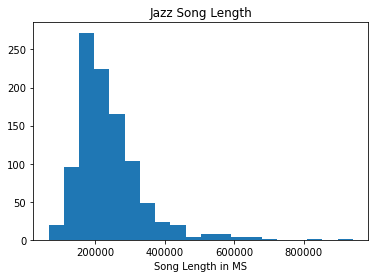

In [20]:
# Don't worry about the matplotlib syntax yet
fig, ax = plt.subplots()
ax.hist(track_durations, bins=20)
ax.set_title('Jazz Song Length')
ax.set_xlabel('Song Length in MS');

Describe the shape of this histogram in the markdown cell below. Is it skewed? Which way? Does the mean you calculated above seem correct? Does it indicate the presence of outliers of song length?

- your answer here
>


# Task 6

Now, let's write a function that takes in any list of track lengths, then prints and returns the mean, variance, and standard deviation of the list.

Feel free to use numpy or other methods to calculate the statistics.

As a bonus, the function is pre-coded to print out a histogram as well.

In [42]:
def track_length_descriptor(track_duration_list, genre=''):
    
    '''
    Params
    ______
    track_duration_list: a list of track lengths in milliseconds 
    returned from the spotify API
    
    genre: a string to add genre to the histogram title.
    
    Returns
    _______
    a list containing the mean, variance, and standard deviation of the tracks
    
    '''
    
    fig, ax = plt.subplots()
    ax.hist(<fill_in>, bins=20)
    ax.set_title(f'{genre} Song Length')
    ax.set_xlabel('Song Length in MS');
    plt.show()
    


SyntaxError: invalid syntax (<ipython-input-42-e2c99dd6d74f>, line 18)

In [44]:
with open('data/track_length_lists', 'rb') as read_file:
    classical_track_durations, rap_track_durations, punk_track_durations = pickle.load(read_file)

Use your function to compare track length statistics between classicle, rap, and punk songs.  

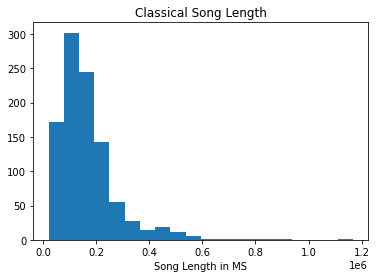


    The mean track length of Classical songs is 165906.707 ms.
    The variance of track lengths of Classical songs is 12858950170.405153 ms.
    The standard deviation of track lengths of Classical songs is 113397.31112511069 ms.
    
    
    


[165906.707, 12858950170.405153, 113397.31112511069]

In [45]:
track_length_descriptor(classical_track_durations, "Classical")

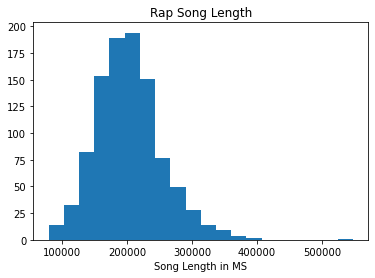


    The mean track length of Rap songs is 202687.558 ms.
    The variance of track lengths of Rap songs is 2652897639.9546356 ms.
    The standard deviation of track lengths of Rap songs is 51506.28738275198 ms.
    
    
    


[202687.558, 2652897639.9546356, 51506.28738275198]

In [46]:
track_length_descriptor(rap_track_durations, 'Rap')

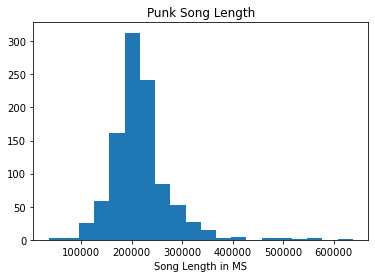


    The mean track length of Punk songs is 216115.196 ms.
    The variance of track lengths of Punk songs is 3202906042.827584 ms.
    The standard deviation of track lengths of Punk songs is 56594.22269832482 ms.
    
    
    


[216115.196, 3202906042.827584, 56594.22269832482]

In [47]:
track_length_descriptor(punk_track_durations, 'Punk')